In [2]:
import pandas as pd 
df = pd.read_parquet(
    "data/ds67python/output2/LFCLF_embedding_human_eval_deepseek-ai_deepseek-coder-6.7b-instruct_1_label.parquet"
)

In [3]:
df.head(10)

,task_id,completion_id,num_tokens,generation,first_token_embedding,last_token_embedding,first_token_code_embedding,last_token_code_embedding,has_error,extracted_code,label,cleaned_code
0,Python/0,Python/0_0,265,Here is the completed function:\n\n```python\n...,"[-0.005126953125, 0.03955078125, -0.26953125, ...","[0.03271484375, -0.0224609375, 0.0673828125, -...","[0.0262451171875, 0.07763671875, -0.1176757812...","[-0.1376953125, -0.1552734375, 0.1650390625, 0...",False,"def has_close_elements(numbers: List[float], t...",True,from typing import List\ndef has_close_element...
1,Python/0,Python/0_1,256,Here is the completed function:\n\n```python\n...,"[-0.005126953125, 0.03955078125, -0.26953125, ...","[0.03955078125, -0.01025390625, 0.08056640625,...","[0.0301513671875, 0.078125, -0.103515625, -0.0...","[-0.1376953125, -0.1572265625, 0.1630859375, 0...",False,"def has_close_elements(numbers: List[float], t...",True,from typing import List\ndef has_close_element...
2,Python/0,Python/0_2,186,```python\nfrom typing import List\n\ndef has_...,"[-0.0537109375, 0.423828125, -0.1845703125, -0...","[0.020751953125, -0.051513671875, 0.0346679687...","[0.028564453125, 0.0771484375, -0.119140625, -...","[-0.1376953125, -0.1572265625, 0.162109375, 0....",False,"def has_close_elements(numbers: List[float], t...",True,from typing import List\ndef has_close_element...
3,Python/0,Python/0_3,186,```python\nfrom typing import List\n\ndef has_...,"[-0.0537109375, 0.423828125, -0.1845703125, -0...","[0.021484375, -0.050537109375, 0.0361328125, 0...","[0.028564453125, 0.0771484375, -0.119140625, -...","[-0.1357421875, -0.154296875, 0.162109375, 0.1...",False,"def has_close_elements(numbers: List[float], t...",True,from typing import List\ndef has_close_element...
4,Python/0,Python/0_4,260,Here is the completed function:\n\n```python\n...,"[-0.005126953125, 0.03955078125, -0.26953125, ...","[0.037353515625, -0.0009765625, 0.08740234375,...","[0.0301513671875, 0.078125, -0.103515625, -0.0...","[-0.1376953125, -0.1572265625, 0.1630859375, 0...",False,"def has_close_elements(numbers: List[float], t...",True,from typing import List\ndef has_close_element...
5,Python/0,Python/0_5,187,```python\nfrom typing import List\n\n\ndef ha...,"[-0.0537109375, 0.423828125, -0.1845703125, -0...","[0.02099609375, -0.05078125, 0.034912109375, 0...","[0.025634765625, 0.0751953125, -0.1337890625, ...","[-0.1376953125, -0.1572265625, 0.162109375, 0....",False,"def has_close_elements(numbers: List[float], t...",True,from typing import List\ndef has_close_element...
6,Python/0,Python/0_6,261,Here is the completed function:\n\n```python\n...,"[-0.005126953125, 0.03955078125, -0.26953125, ...","[0.036865234375, -0.02197265625, 0.068359375, ...","[0.0301513671875, 0.078125, -0.103515625, -0.0...","[-0.13671875, -0.1552734375, 0.1630859375, 0.1...",False,"def has_close_elements(numbers: List[float], t...",True,from typing import List\ndef has_close_element...
7,Python/0,Python/0_7,266,Here is the completed function:\n\n```python\n...,"[-0.005126953125, 0.03955078125, -0.26953125, ...","[0.033935546875, -0.0234375, 0.0673828125, -0....","[0.0262451171875, 0.07763671875, -0.1176757812...","[-0.1376953125, -0.1572265625, 0.1640625, 0.13...",False,"def has_close_elements(numbers: List[float], t...",True,from typing import List\ndef has_close_element...
8,Python/0,Python/0_8,186,```python\nfrom typing import List\n\n\ndef ha...,"[-0.0537109375, 0.423828125, -0.1845703125, -0...","[0.02001953125, -0.05078125, 0.0361328125, 0.0...","[0.025634765625, 0.0751953125, -0.1337890625, ...","[-0.1376953125, -0.154296875, 0.1640625, 0.128...",False,"def has_close_elements(numbers: List[float], t...",True,from typing import List\ndef has_close_element...
9,Python/0,Python/0_9,267,Here is the completed function:\n\n```python\n...,"[-0.005126953125, 0.03955078125, -0.26953125, ...","[0.039306640625, -0.0244140625, 0.0654296875, ...","[0.0262451171875, 0.07763671875, -0.1176757812...","[-0.13769

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
def plot(X,y):
    tsne = TSNE(n_components=2,perplexity=20, random_state=42)
    X_2d = tsne.fit_transform(np.array([el.tolist() for el in X]))
    plt.scatter(X_2d[y == 0, 0], X_2d[y == 0, 1], label="Label 0", alpha=0.6, c="blue")
    plt.scatter(X_2d[y == 1, 0], X_2d[y == 1, 1], label="Label 1", alpha=0.6, c="red")
    
    plt.legend()
    plt.title("t-SNE Visualization")
    plt.show()



In [ ]:
X = df['last_token_embedding'].values
y = df['label'].values
plot(X,y)

In [ ]:
X = df['first_token_embedding'].values
y = df['label'].values
plot(X,y)

In [ ]:
def sub_vector(x2,x1):
    x3 = list(x2) 
    for idx,i in enumerate(x1):
        x3[idx] = x3[idx] -i
    return x3
X1 = df['first_token_embedding'].values
X2 = df['last_token_embedding'].values
X = np.array([sub_vector(x2,x1) for x2,x1 in zip(X2,X1)])
y = df['label'].values
plot(X,y)

In [ ]:
def sub_vector(x2, x1):
    x3 = list(x1)
    x3.extend(x2)
    return x3
X1 = df["first_token_embedding"].values
X2 = df["last_token_embedding"].values
X = np.array([sub_vector(x2, x1) for x2, x1 in zip(X2, X1)])
y = df["label"].values
plot(X, y)

In [ ]:
def sub_vector(x2, x1):
    x3 = list(x2)
    for idx, i in enumerate(x1):
        x3[idx] = (x3[idx] - i) ** 2
    return x3
X1 = df["first_token_embedding"].values
X2 = df["last_token_embedding"].values
X = np.array([sub_vector(x2, x1) for x2, x1 in zip(X2, X1)])
y = df["label"].values
plot(X, y)

In [ ]:
import pandas as pd

df2 = pd.read_parquet(
    "data/ds67cpp/output2/LFCLF_embedding_human_eval_deepseek-ai_deepseek-coder-6.7b-instruct_32.parquet"
)

In [ ]:
df2.head()

In [ ]:
df.head()

In [ ]:
def sub_vector(x2, x1):
    x3 = list(x1)
    x3.extend(x2)
    return x3

X1 = df["last_token_embedding"].values
X2 = df2["last_token_embedding"].values
X = np.array([sub_vector(x2, x1) for x2, x1 in zip(X2, X1)])
y = df["label"].values
plot(X, y)

In [ ]:
dfs = pd.read_csv("data/result_cpp_last_token_embedding.csv")
dfs.head()

In [ ]:
labels = list()
for _,row in dfs.iterrows():
    if row['ref'] == 0:
        if row['predict'] == 0:
            labels.append(0)
        else:
            labels.append(2)
    else:
        if row["predict"] == 1:
            labels.append(1)
        else:
            labels.append(3)

In [ ]:
labels[:10]

In [ ]:
X = df2["last_token_embedding"].values
y = labels
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def plot2(X, y):
    tsne = TSNE(n_components=2, perplexity=20, random_state=42)
    X_2d = tsne.fit_transform(np.array([el.tolist() for el in X]))
    colors = ["green", "red", "blue", "orange"]  # Adjust colors for 4 labels
    lbs = np.unique(y)
    # Plot each class with a unique color
    for label, color in zip(lbs, colors):
        plt.scatter(
            X_2d[y == label, 0],
            X_2d[y == label, 1],
            label=f"Label {label}",
            alpha=0.6,
            color=color,
        )
    plt.legend()
    plt.title("t-SNE Visualization")
    plt.show()
plot2(X, y)

In [ ]:
X = df2["last_token_embedding"].values
y = df["label"].values
plot(X,y)

In [ ]:
layers = [1]
layers.extend([i for i in range(4,32,4)])
layers

In [ ]:
lasts_embed = list()
for layer in layers:
    tmp_df = pd.read_parquet(
        f"data/ds67cpp/output2/LFCLF_embedding_human_eval_deepseek-ai_deepseek-coder-6.7b-instruct_{layer}.parquet"
    )
    lasts_embed.append(tmp_df["last_token_embedding"].values)

In [ ]:
firsts_embed = list()
for layer in layers:
    tmp_df = pd.read_parquet(
        f"data/ds67cpp/output2/LFCLF_embedding_human_eval_deepseek-ai_deepseek-coder-6.7b-instruct_{layer}.parquet"
    )
    firsts_embed.append(tmp_df["first_token_embedding"].values)

In [ ]:
import pickle
pickle.dump(lasts_embed,open('last_token_full_layer_embedding.pkl','wb'))

In [ ]:
from numpy.linalg import norm
def cosine(v1,v2):
    A = np.array(v1)
    B = np.array(v2)
    cosine = np.dot(A, B) / (norm(A) * norm(B))
    return cosine

X = list()
for i in range(len(lasts_embed[0])):
    temp_emb_last =list()
    temp_emb_first = list()
    temp_emb_consistence= list()
    # consistance layer x2
    # consistence first last
    for j in range(len(lasts_embed)):
        temp_emb_consistence.append(cosine(lasts_embed[j][i], firsts_embed[j][i]))
        for k in range(j+1,len(lasts_embed)):
            temp_emb_last.append(cosine(lasts_embed[j][i], lasts_embed[k][i]))
            temp_emb_first.append(cosine(firsts_embed[j][i], firsts_embed[k][i]))
    temp_emb = temp_emb_consistence + temp_emb_first + temp_emb_last
    X.append(temp_emb)

In [ ]:
len(X[0])

In [ ]:
X = np.array(X)
y = df["label"].values
plot(X, y)

In [ ]:
X = df2["last_token_embedding"].values
y = df["label"].values
plot(X, y)

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


def plot_annotate(X, y,annotates):
    tsne = TSNE(n_components=2, perplexity=20, random_state=42)
    X_2d = tsne.fit_transform(np.array([el.tolist() for el in X]))
    plt.scatter(X_2d[y == 0, 0], X_2d[y == 0, 1], label="Label 0", alpha=0.6, c="blue")
    plt.scatter(X_2d[y == 1, 0], X_2d[y == 1, 1], label="Label 1", alpha=0.6, c="red")

    for i, word in enumerate(annotates):
        plt.annotate(
            f"{i}_{word}",
            xy=(X_2d[i, 0], X_2d[i, 1]),
            xytext=(5, 2),
            textcoords="offset points",
            ha="right",
            va="bottom",
        )

    plt.legend()
    plt.title("t-SNE Visualization")
    plt.show()

In [ ]:
df2.head(1)

In [ ]:
annotates = list()
import re
for text in df2['completion_id'].values:
    res = re.findall(r'\d+',text)
    if len(res) != 2:
        annotates.append('unk')
    else:
        annotates.append(f'{res[0]}')

In [ ]:
import random 
sample_index = random.sample([i for i in range(1610)],200)

In [ ]:
X = df2["last_token_embedding"].values
y = df["label"].values
plot_annotate(X, y, annotates)

In [ ]:
annotates = np.array(annotates)

In [ ]:
sX = X[sample_index]
sL = y[sample_index]
sA = annotates[sample_index]
plot_annotate(sX,sL,sA)

In [ ]:
df.head()

In [ ]:
debug_23 = df[df["task_id"] == "HumanEval_23_strlen"]

In [ ]:
debug_23.head(1)

In [ ]:
list(set(df["task_id"].values))[:10]

In [ ]:
def distance(v1, v2):
    point1 = np.array(v1)
    point2 = np.array(v2)
    dist = np.linalg.norm(point1 - point2)
    return dist

In [ ]:
tasks = list(set(df["task_id"].values))[:10]
for task in tasks:
    print(task)
    debug = df[df['task_id']==task]
    lasts = debug["last_token_embedding"].values
    lbs = debug["label"].values
    if len(set(lbs)) != 2:
        continue
    print('='*33)
    print("*" * 10, task, "*" * 10)
    print('_'*33)
    for i in range(len(lasts)):
        for j in range(i+1,len(lasts)):
            print(i, j, lbs[i], lbs[j], distance(lasts[i], lasts[j]))

In [ ]:


debug = df.sample(20)
lasts = debug["last_token_embedding"].values
lbs = debug["label"].values
task_ids = debug["task_id"].values
print('='*33)
print("*" * 10, task, "*" * 10)
print('_'*33)

for i in range(len(lasts)):
    for j in range(i+1,len(lasts)):
        print(
            i, j, task_ids[i], task_ids[j], lbs[i], lbs[j], distance(lasts[i], lasts[j])
        )
        # print(distance(lasts[i], lasts[j]))

In [125]:
from numpy.linalg import norm
X = list()
for i in range(len(lasts_embed[0])):
    temp_emb_last = list()
    temp_emb_first = list()
    temp_emb_consistence = list()
    # consistance layer x2
    # consistence first last
    for j in range(len(lasts_embed)):
        temp_emb_consistence.append(distance(lasts_embed[j][i], firsts_embed[j][i]))
        for k in range(j + 1, len(lasts_embed)):
            temp_emb_last.append(distance(lasts_embed[j][i], lasts_embed[k][i]))
            temp_emb_first.append(distance(firsts_embed[j][i], firsts_embed[k][i]))
    temp_emb = temp_emb_consistence + temp_emb_first + temp_emb_last
    X.append(temp_emb + lasts_embed[-1][i])

ValueError: operands could not be broadcast together with shapes (64,) (4096,) 

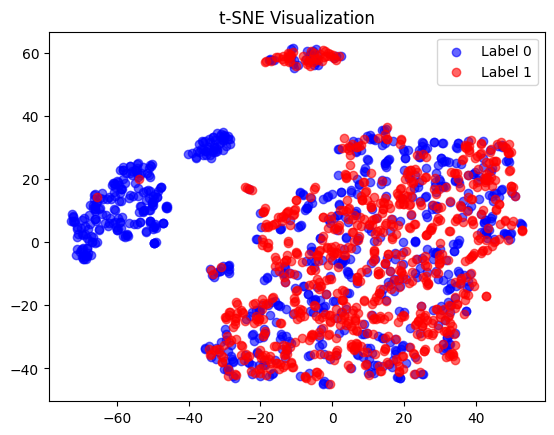

In [124]:
X = np.array(X)
y = df["label"].values
plot(X, y)